## Breadth first search (BFS)

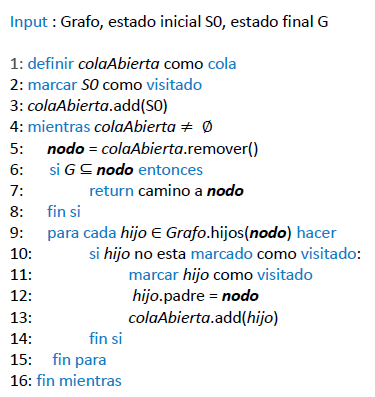

In [30]:
import networkx as nx
import matplotlib.pyplot as plt<

In [100]:
class Nodo:
    def __init__(self,nodo,nodosHijos=[],nodoPadre=None):
        self.nodo = nodo
        self.nodosHijos = nodosHijos
        self.nodoPadre = None
    def __str__(self):
        formato = "{0}"
        return formato.format(self.nodo)
    def __eq__(self, obj):
        return (self.nodo==obj.nodo)

In [97]:
class BFS:  
    def buscar(self,nodoInicial,nodoMeta):
        nodosAbiertos=[]
        nodosVisitados=[]    
        nodosAbiertos.append(nodoInicial)  
        contador = 0
        while nodosAbiertos:           
            nodo=nodosAbiertos.pop(0) 
            if nodo==nodoMeta:                
                return nodo,True,nodosVisitados            
            nodosVisitados.append(nodo)                            
            contador = contador +1               
            for nodohijo in nodo.nodosHijos:
                if not nodohijo in nodosVisitados:                                                         
                    nodohijo.nodoPadre = nodo                         
                    nodosAbiertos.append(nodohijo)
        return None,False,nodosVisitados

In [91]:
def crear_ruta_nodos(nodo):
    nodoTemp =nodo
    listaNodos=[]
    while(nodoTemp):
        listaNodos.insert(0,nodoTemp)
        nodoTemp = nodoTemp.nodoPadre
    return listaNodos 

In [96]:
def graficar_ruta_nodos(lista_nodos):
    grap = nx.DiGraph()        
    for i in range(len(lista_nodos)-1):
        j = i+1
        nodoA = lista_nodos[i]           
        nodoB = lista_nodos[j]        
        grap.add_edges_from([(str(nodoA), str(nodoB))],weight=j)  
    edge_labels=dict([((u,v,),d['weight'])
                     for u,v,d in grap.edges(data=True)])
    pos_labels=nx.circular_layout(grap)
    plt.figure(figsize=(10,5)) 
    grap.size(weight='weight')
    nx.draw_networkx_edge_labels(grap,pos_labels,edge_labels=edge_labels)
    nx.draw(grap,pos_labels, node_size=1000,with_labels=True, font_weight='bold')        
    plt.show()

In [92]:
def imprimir_lista_visitados(nodosVisitados):    
    print("Nodos Visitados")
    for nodoVis in nodosVisitados:
        print(str(nodoVis))
    print("----------------------")

In [95]:
A = Nodo("A")
B = Nodo("B")
C = Nodo("C")
D = Nodo("D")
E = Nodo("E")
F = Nodo("F")
G = Nodo("G")
A.nodosHijos=[B,C]
B.nodosHijos=[D,E,F]
C.nodosHijos=[G]

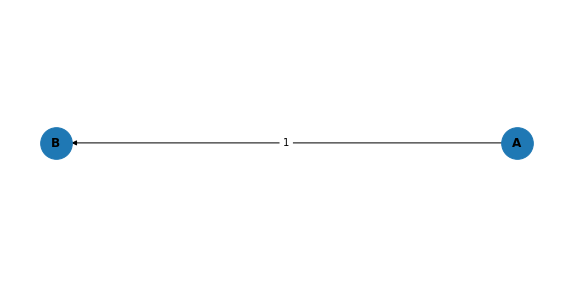

Nodos Visitados
A
----------------------


In [101]:
bsf = BFS()
nodoMeta,estado,visitados = bsf.buscar(A,B)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

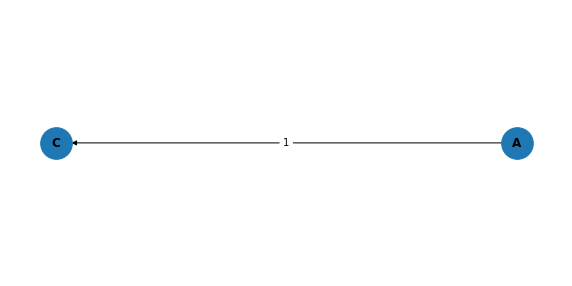

Nodos Visitados
A
B
----------------------


In [102]:
bsf = BFS()
nodoMeta,estado,visitados = bsf.buscar(A,C)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

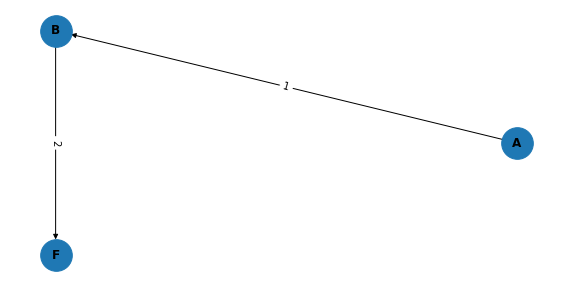

Nodos Visitados
A
B
C
D
E
----------------------


In [103]:
bsf = BFS()
nodoMeta,estado,visitados = bsf.buscar(A,F)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

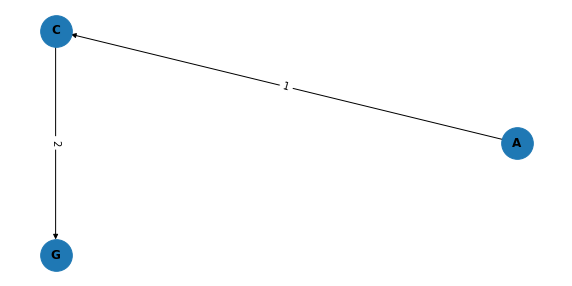

Nodos Visitados
A
B
C
D
E
F
----------------------


In [104]:
bsf = BFS()
nodoMeta,estado,visitados = bsf.buscar(A,G)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)